# Gambler's Problem

In [1]:
import random, numpy, pandas, matplotlib, os
import matplotlib.pyplot as plt

/tmp/ipykernel_138530/871683671.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import random, numpy, pandas, matplotlib, os


In [46]:
goal = 100
def arange(x, start = 0):
    return range(start, x+1)
    
states = arange(goal)
actions = arange(goal)

p_h = 0.4 #probability of heads

def actions_from_state(s, start = 1):
    return list(arange(min(s,100-s),start=1))

def weighted_children(s, a):
    if a == 0 or a > s or a > 100 - s:
        return None
    children = [
        (s + a, 1 if s + a == 100 else 0, p_h),  # win case
        (s - a, 0, 1 - p_h)                       # lose case
    ]
    return children

In [47]:
s=7
for a in actions_from_state(s):
    print(s,a,weighted_children(s,a))

7 1 [(8, 0, 0.4), (6, 0, 0.6)]
7 2 [(9, 0, 0.4), (5, 0, 0.6)]
7 3 [(10, 0, 0.4), (4, 0, 0.6)]
7 4 [(11, 0, 0.4), (3, 0, 0.6)]
7 5 [(12, 0, 0.4), (2, 0, 0.6)]
7 6 [(13, 0, 0.4), (1, 0, 0.6)]
7 7 [(14, 0, 0.4), (0, 0, 0.6)]


## Value Iteration

In [58]:
theta = 1e-50
done = False
V = [0 for s in states]
V[100] = 1
V[0] = 0
gamma = 0.95
pi = [ 0 for s in states ]

def reward(s):
    return 1 if s==100 else 0
    
while (not done):
    delta = 0
    for s in range(1,100):
        state_actions = actions_from_state(s)
        action_values = []
        v = V[s]
        for a in state_actions:
            action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (1-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
        best_value = max(action_values, key=lambda x:(x[0],-(x[1])))[0]
        V[s] = best_value
        delta = max(delta, abs(v - V[s]))
    done = (delta < theta)
V[100]=0

In [59]:
V[2]

0.007608468209227547

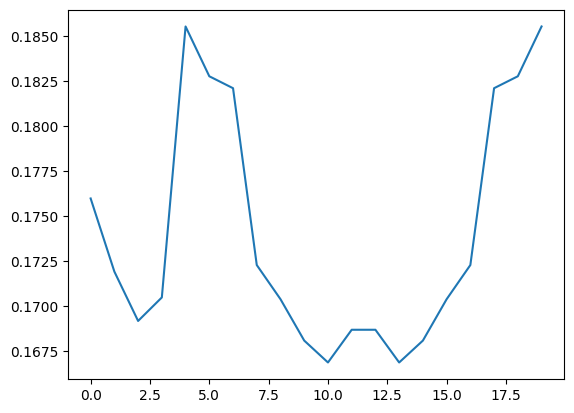

In [64]:
pi = [0]*101
for s in range(1,100):
    state_actions = actions_from_state(s)
    action_values = []
    for a in state_actions:
        action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (1-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
    if (s==20):
        plt.plot([x[0] for x in action_values])
    best_action = max(action_values, key=lambda x:(x[0],-x[1]))[1]
    pi[s] = best_action

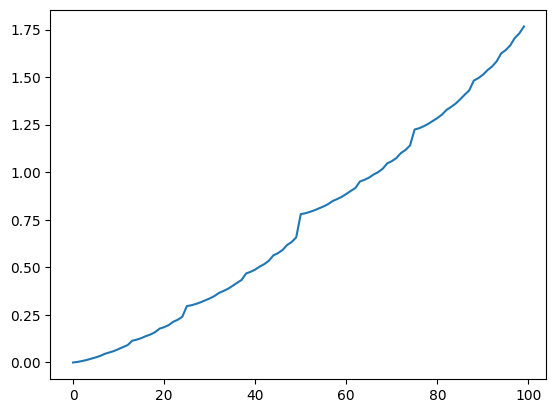

In [61]:
plt.plot(V[:-1])

<BarContainer object of 101 artists>

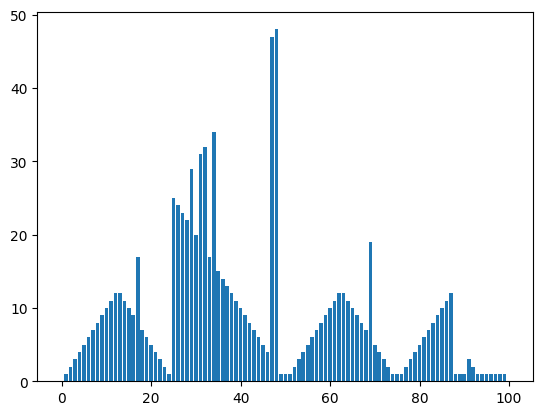

In [62]:
plt.bar(range(len(pi)),pi)

In [76]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = 0.55
GAMMA = 1
rewards = np.zeros(101) #rewards for each state including 100
rewards[100] = 1

class value_iteration:
	def __init__(self):
		self.val_state = np.zeros(101, dtype=np.float128) #start_state is from 1 to 99 (0 and 100 are dummy)
		self.policy = np.zeros(100, dtype=np.float128) #policy for each state
	
	def bellman(self, state, action, val_state):
		return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

	def val_iteration(self, epsilon = 1e-20):
		while True:
			delta = 0
			for state in range(1,100): 
				v = self.val_state[state] 
				max_action = min(state, 100-state)
				val_action = np.zeros(max_action+1, dtype=np.float128)
				for action in range(1, max_action+1):
					val_action[action] = self.bellman(state, action, self.val_state) 
					#val is weighted val (by p_head) of next state value or 1 if reach 100
				self.val_state[state] = np.max(val_action)
				delta = max(delta, np.abs(self.val_state[state] - v)) #find maximum change over all states
			if delta < epsilon:
				break
		return self.policy_it()


	def policy_it(self):
		for state in range(1,100):
			max_action = min(state, 100-state)
			val_action = np.zeros(max_action+1)
			for action in range(1, max_action+1):
				val_action[action] = self.bellman(state, action, self.val_state)
			best_action = np.argmax(val_action)
			#print(state, -np.sort(-val_action)[:2])
			self.policy[state] = best_action
		return self.val_state, self.policy


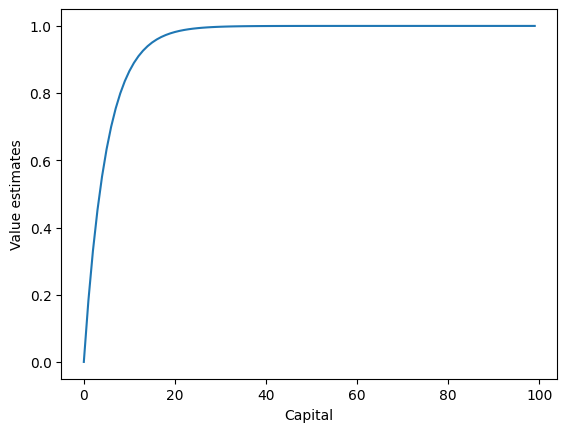

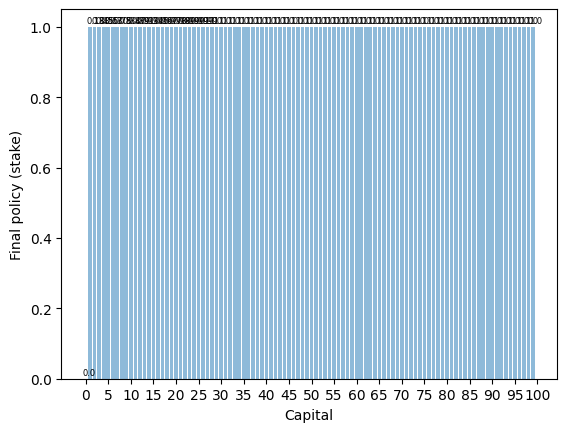

In [77]:
vi = value_iteration()
v, p = vi.val_iteration()

# pi = policy_iteration()
# v, p = pi.policy_evaluation()
# print(v)
# print(p)

plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p[i] + 0.01, str(round(v[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()

In [78]:
-np.sort(-v)[:2]

array([1., 1.], dtype=float128)

In [45]:
V = np.array([float(x) for x in V])

In [23]:
V-v

array([0.        , 0.74793438, 0.93233594, 0.97514953, 0.9831836 ,
       0.98163804, 0.97669218, 0.97212485, 0.96770935, 0.96231111,
       0.95653555, 0.94964529, 0.94234075, 0.93476061, 0.93046471,
       0.92556876, 0.91931153, 0.91338896, 0.90578732, 0.89685638,
       0.89134126, 0.88403337, 0.87411383, 0.86642002, 0.85585201,
       0.84      , 0.83690156, 0.83225391, 0.82616179, 0.82063477,
       0.8139219 , 0.80540448, 0.79827883, 0.79158692, 0.78347239,
       0.77480475, 0.7644683 , 0.75351121, 0.74214094, 0.73569708,
       0.72835314, 0.7189673 , 0.71008343, 0.69868098, 0.68528456,
       0.67701188, 0.66605006, 0.65117074, 0.63963004, 0.62377802,
       0.6       , 0.59690156, 0.59225391, 0.58616179, 0.58063477,
       0.5739219 , 0.56540448, 0.55827883, 0.55158692, 0.54347239,
       0.53480475, 0.5244683 , 0.51351121, 0.50214094, 0.49569708,
       0.48835314, 0.4789673 , 0.47008343, 0.45868098, 0.44528456,
       0.43701188, 0.42605006, 0.41117074, 0.39963004, 0.38377

In [24]:
import mpmath as mp
import random

# Set precision for mpmath
mp.mp.dps = 150  # set the decimal places for precision

# Problem setup
theta = mp.mpf('1e-20')
done = False
goal = 100
states = list(range(goal + 1))  # defining states from 0 to 100
V = [mp.mpf(random.random()) for s in states]
V[100] = mp.mpf(0)
V[0] = mp.mpf(0)
gamma = mp.mpf(1)
pi = [0 for s in states]

# Defining reward function
def reward(s):
    return mp.mpf(1) if s == 100 else mp.mpf(0)

# Placeholder for actions_from_state and weighted_children functions
def actions_from_state(s):
    return range(1, min(s, goal - s) + 1)  # valid betting actions

def weighted_children(s, a):
    return [(s + a, reward(s + a), mp.mpf('0.4')), (s - a, reward(s - a), mp.mpf('0.6'))]

# Value iteration loop
while not done:
    delta = mp.mpf(0)
    for s in range(1, 100):
        v = V[s]
        state_actions = actions_from_state(s)
        action_values = []
        for a in state_actions:
            action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
        best_value = max(action_values, key=lambda x:x[0])[0]
        V[s] = best_value
        delta = max(delta, abs(v - V[s]))
    done = (delta < theta)

V[100] = mp.mpf(0)

# Output results
print("Value Estimates:")
print([float(v) for v in V])  # converting mpmath types to floats for easier reading


Value Estimates:
[0.0, 0.7500000000000001, 0.9375, 0.984375, 0.99609375, 0.9990234375, 0.999755859375, 0.99993896484375, 0.9999847412109375, 0.9999961853027344, 0.9999990463256836, 0.9999997615814209, 0.9999999403953552, 0.9999999850988388, 0.9999999962747097, 0.9999999990686774, 0.9999999997671694, 0.9999999999417923, 0.9999999999854481, 0.999999999996362, 0.9999999999990905, 0.9999999999997726, 0.9999999999999432, 0.9999999999999858, 0.9999999999999964, 0.9999999999999991, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [25]:
def fv(a):
    return [float(x[0]) for x in a]

In [26]:
my_v = V
the_v = v

In [27]:
pi = [0]*101
VV = my_v
p_h = mp.mpf('0.4')
gamma = mp.mpf(1)
for s in range(1,100):
    state_actions = actions_from_state(s)
    action_values = []
    the_action_values = []
    for a in state_actions:
        action_values.append( (p_h*(reward(s+a)+gamma*VV[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*VV[s-a]),a) )
        the_action_values.append( (p_h*(reward(s+a)+gamma*the_v[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*the_v[s-a]),a) )
    best_action = max(action_values, key=lambda x:x[0])[1]
    difference = np.array(fv(action_values)) - np.array(fv(the_action_values))
    print(s, np.max(difference))
    pi[s] = best_action

TypeError: 'mpf' object is not subscriptable

In [ ]:
plt.bar(range(len(pi)),pi)

In [ ]:
mp.mpf('0.4')

In [ ]:
import numpy as np

# Check properties of np.float128
print(np.finfo(np.float128))


In [ ]:
import numpy as np

# Check properties of np.float64
print(np.finfo(np.float64))


In [ ]:
import sys
import math

print("Float information (sys.float_info):")
print(sys.float_info)

print("\nSmallest positive float (math.ulp(0.0)):")
print(math.ulp(0.0))  # Smallest amount by which two floating-point numbers can differ


In [195]:
p

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.], dtype=float128)

In [196]:
v

array([0.        , 0.00206562, 0.00516406, 0.00922547, 0.01291015,
       0.0173854 , 0.02306368, 0.02781411, 0.03227539, 0.03768507,
       0.0434635 , 0.05035447, 0.05765919, 0.06523937, 0.06953528,
       0.07443124, 0.08068847, 0.08661104, 0.09421268, 0.10314362,
       0.10865874, 0.11596663, 0.12588617, 0.13357998, 0.14414799,
       0.16      , 0.16309844, 0.16774609, 0.17383821, 0.17936523,
       0.1860781 , 0.19459552, 0.20172117, 0.20841308, 0.21652761,
       0.22519525, 0.2355317 , 0.24648879, 0.25785906, 0.26430292,
       0.27164686, 0.2810327 , 0.28991657, 0.30131902, 0.31471544,
       0.32298812, 0.33394994, 0.34882926, 0.36036996, 0.37622198,
       0.4       , 0.40309844, 0.40774609, 0.41383821, 0.41936523,
       0.4260781 , 0.43459552, 0.44172117, 0.44841308, 0.45652761,
       0.46519525, 0.4755317 , 0.48648879, 0.49785906, 0.50430292,
       0.51164686, 0.5210327 , 0.52991657, 0.54131902, 0.55471544,
       0.56298812, 0.57394994, 0.58882926, 0.60036996, 0.61622

In [200]:
with open("gambler-policy.txt", "w") as f:
    for i in range(100):
        f.write(f"{i} {p[i]}\n")

In [201]:
with open("gambler-value.txt", "w") as f:
    for i in range(100):
        f.write(f"{i} {v[i]}\n")